                     Sentiment Analysis Model

In [6]:
#Load required libraries
import pandas as pd
import numpy as np

In [7]:
# Load the data into dataframe

moviedata = pd.read_excel("/Users/manikantanvenkataraman/Downloads/labeledtraindata.xlsx", encoding='utf8')
moviedata.head()

,id,sentiment,review
0,5814_8,1.0,With all this stuff going down at the moment w...
1,2381_9,1.0,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0.0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0.0,It must be assumed that those who praised this...
4,9495_8,1.0,Superbly trashy and wondrously unpretentious 8...


In [8]:
# Step 1 - Convert the review data into lower case
moviedata['review']=moviedata['review'].str.lower()
moviedata.head()

,id,sentiment,review
0,5814_8,1.0,with all this stuff going down at the moment w...
1,2381_9,1.0,"\the classic war of the worlds\"" by timothy hi..."
2,7759_3,0.0,the film starts with a manager (nicholas bell)...
3,3630_4,0.0,it must be assumed that those who praised this...
4,9495_8,1.0,superbly trashy and wondrously unpretentious 8...


In [9]:
# Step 2 - Remove Punctuation

import sys, unicodedata # Load sys and unicode library

# Assign the puntuation characters to a variable table
table = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

# Function to process all the records in the dataframe
def tokenize(message):
    #message = unicode(message,'utf-8').lower()
    #print message
    message = remove_punctuation_unicode(message)
    return message

# Function to remove punctuation
def remove_punctuation_unicode(string):
    return string.translate(table)

# Remove nulls
moviedata = moviedata[moviedata['review'].isnull() == False]


# Apply the remove punctuation function on review field an dassign it to another variable
moviedata['review'] = moviedata['review'].apply(tokenize)
moviedata

,id,sentiment,review
0,5814_8,1.0,with all this stuff going down at the moment w...
1,2381_9,1.0,the classic war of the worlds by timothy hines...
2,7759_3,0.0,the film starts with a manager nicholas bell g...
3,3630_4,0.0,it must be assumed that those who praised this...
4,9495_8,1.0,superbly trashy and wondrously unpretentious 8...
...,...,...,...
25673,3453_3,0.0,it seems like more consideration has gone into...
25674,5064_1,0.0,i dont believe they made this film completely ...
25675,10905_3,0.0,guy is a loser cant get girls needs to build u...
25676,10194_3,0.0,this 30 minute documentary buñuel made in the ...


In [10]:
# Remove stop words

from nltk.corpus import stopwords # Load library
import nltk
nltk.download('stopwords')
stop_words=stopwords.words('english') #Remove stop words

#Apply function to remove stopwords
moviedata['review'] = moviedata['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
moviedata

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manikantanvenkataraman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,sentiment,review
0,5814_8,1.0,stuff going moment mj ive started listening mu...
1,2381_9,1.0,classic war worlds timothy hines entertaining ...
2,7759_3,0.0,film starts manager nicholas bell giving welco...
3,3630_4,0.0,must assumed praised film greatest filmed oper...
4,9495_8,1.0,superbly trashy wondrously unpretentious 80s e...
...,...,...,...
25673,3453_3,0.0,seems like consideration gone imdb reviews fil...
25674,5064_1,0.0,dont believe made film completely unnecessary ...
25675,10905_3,0.0,guy loser cant get girls needs build picked st...
25676,10194_3,0.0,30 minute documentary buñuel made early 1930s ...


In [11]:
#NLTK porter stemmer

from nltk.stem.porter import PorterStemmer # Load library
porter_stemmer=PorterStemmer() 

#Function to apply porterstemmer to dataframe records

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Apply the funtion on review_refined field in traindata_df_ref

moviedata['review'] = moviedata['review'].apply(stem_sentences)
moviedata.head()

,id,sentiment,review
0,5814_8,1.0,stuff go moment mj ive start listen music watc...
1,2381_9,1.0,classic war world timothi hine entertain film ...
2,7759_3,0.0,film start manag nichola bell give welcom inve...
3,3630_4,0.0,must assum prais film greatest film opera ever...
4,9495_8,1.0,superbl trashi wondrous unpretenti 80 exploit ...


In [12]:
# Split the data into train and test

from sklearn.model_selection import train_test_split # Load the library
moviedata_train, moviedata_test = train_test_split(moviedata,test_size=0.20)

In [13]:
moviedata_train

,id,sentiment,review
20054,9538_2,0.0,saw commerci see forgiv long sinc ive seen don...
10681,3161_1,0.0,much dead bodi pain unfunni actual squirm seat...
1458,8386_1,0.0,rip movi apart like shoot fish barrel easi im ...
9472,11152_10,1.0,watch midnight cowboy like take masterclass ac...
1891,11436_9,1.0,kind pictur john lassit would make today weren...
...,...,...,...
25366,4574_1,0.0,went film expect similar matrix pi boy wrong y...
22253,11663_8,1.0,secret kell independ anim featur give us one f...
8271,10539_10,1.0,good movi recommend dont like intellig movi tw...
525,1116_9,1.0,sandra ye must know would still nine year late...


In [14]:
moviedata_test

,id,sentiment,review
21422,7052_8,1.0,joshua seftel first film satir memor proport t...
14529,6714_4,0.0,oh well movi start well kinda funni seem like ...
10613,3150_1,0.0,suppos wellresearch base fact come therefor pa...
7113,2198_8,1.0,third fred macmurraycarol lombard film bit ser...
22874,1628_1,0.0,without question one embarrass product 1970 ga...
...,...,...,...
2404,3598_3,0.0,know look collect old videotap movi realiz you...
12040,8955_8,1.0,bell book candl shown recent cabl seen decid t...
6904,11328_3,0.0,everi rent actionadventur film way relax occup...
265,8645_1,0.0,got back free screen osama witch project hands...


In [15]:
# tf - Idf feature matrix for training data set
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
# Remove nulls
moviedata_train = moviedata_train[moviedata_train['sentiment'].isna() == False]
x_train=tfidf.fit_transform(moviedata_train['review'])
y_train=moviedata_train['sentiment']
x_train.shape[1] # Obtain number of unique words in the dictionary

76309

In [16]:
# tf - Idf applied but not fit
# Remove nulls
moviedata_test = moviedata_test[moviedata_test['sentiment'].isna() == False]

x_test = tfidf.transform(moviedata_test['review'])
y_test=moviedata_test['sentiment']
x_test

<4998x76309 sparse matrix of type '<class 'numpy.float64'>'
	with 476888 stored elements in Compressed Sparse Row format>

In [25]:
# Fit the logistic regression model

import sklearn

lr = sklearn.linear_model.LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [26]:
# Test Model Accuracy
from sklearn.metrics import accuracy_score

y_pred = lr.predict(x_test)
print("Accuracy: ",round(accuracy_score(y_test,y_pred),3))

Accuracy:  0.888


In [27]:
#Confustion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[2178,  322],
       [ 239, 2259]])

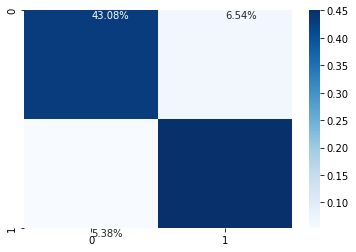

In [56]:
# Heat map of confusion matrix
sns.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%', annot=True,annot_kws=annot_kws, cmap='Blues')

In [53]:
# Precision - metric that quantifies the number of correct positive predictions made.
TP=2155
FP=327
FN=269
TN=2251

Precision = TP / (TP + FP)
Precision

0.8682514101531024

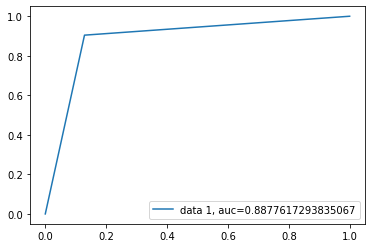

In [30]:
# ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [54]:
# Recall - measures the proportion of actual positives that were predicted correctly
Recall= TP/(TP+FN)
Recall

0.889026402640264

In [57]:
# F1 -F-score - Precision and Recall to obtain a balanced classification model.

from sklearn import metrics
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

F1:  0.883


# Decision Tree

In [31]:
import sklearn

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
# Test Model Accuracy
from sklearn.metrics import accuracy_score

y_pred = dtc.predict(x_test)
print("Accuracy: ",round(accuracy_score(y_test,y_pred),3))

Accuracy:  0.716


In [33]:
#Confustion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[1789,  711],
       [ 710, 1788]])

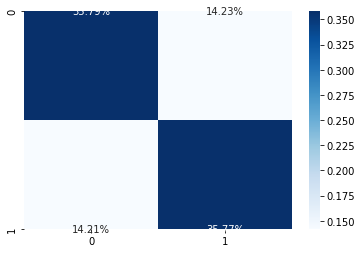

In [34]:
# Heat map of confusion matrix
sns.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%', annot=True,cmap='Blues')

In [22]:
# Precision - metric that quantifies the number of correct positive predictions made.
TP=1791
FP=709
FN=700
TN=1798

Precision = TP / (TP + FP)
Precision

0.7164

In [23]:
# Recall - measures the proportion of actual positives that were predicted correctly
Recall= TP/(TP+FN)
Recall

0.7189883580891209

In [24]:
# F1 -F-score - Precision and Recall to obtain a balanced classification model.

from sklearn import metrics
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

F1:  0.718


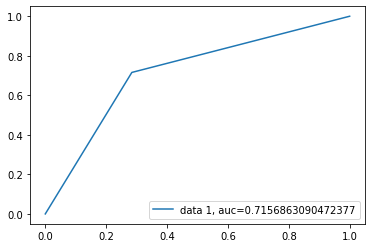

In [35]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()